<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 분류 - 고객 이탈율

고객 이탈 데이터 활용
- Telco Customer Churn 데이터 활용
- 출처 : [Kaggle Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)
- 총 21개 컬럼 중 Target 컬럼은 `Churn`

---

# Import Libraries & Load data

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/Telco_Customer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Visual Python: Library > columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# 타겟 컬럼
target_col = 'Churn'
# 수치형 컬럼
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# EDA & Data Preprocessing

#### Q. 데이터의 상위 5개 행을 출력하세요.

In [5]:
# Visual Python: Data Analysis > Data Info
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Q. 각 컬럼별 데이터 타입과 데이터 개수를 확인하세요.

In [6]:
# Visual Python: Data Analysis > Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Q. `customerID` 컬럼을 삭제하세요.

In [7]:
# Visual Python: Data Analysis > Frame
df.drop(['customerID'], axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Q. 수치형 컬럼 중 `object` 타입으로 되어 있는 `TotalCharges` 컬럼의 타입을 `float`으로 변경하세요.
- 단, ' ' 공백 데이터는 np.nan으로 변경한 후 데이터 타입을 변경하시오.

In [8]:
# Visual Python: Data Analysis > Frame
df['TotalCharges'] = df[['TotalCharges']].replace({' ': np.nan})
df = df.astype({'TotalCharges': 'float64'})
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Q. `TotalCharges`의 결측치 수를 확인한 후, 결측치가 있다면 그 행을 제거하세요.

In [9]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df[['TotalCharges']].isnull().sum(), 'Non-Null Count': df[['TotalCharges']].notnull().sum()})

,Null Count,Non-Null Count
TotalCharges,11,7032


In [10]:
# Visual Python: Data Analysis > Frame
df.dropna(axis=0, subset=['TotalCharges'], how='all', inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Q. 수치형 컬럼들의 통계값을 출력하세요.
- 수치형 컬럼: `tenure`, `MonthlyCharges`, `TotalCharges`

In [11]:
# Visual Python: Data Analysis > Data Info
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


#### Q. 수치형 컬럼간 상관계수를 확인하시오.
- 수치형 컬럼: `tenure`, `MonthlyCharges`, `TotalCharges`

In [12]:
# Visual Python: Data Analysis > Data Info
df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


#### Q. 히스토그램을 이용해 수치형 컬럼들의 데이터 분포를 확인하시오.
- 수치형 컬럼: `tenure`, `MonthlyCharges`, `TotalCharges`

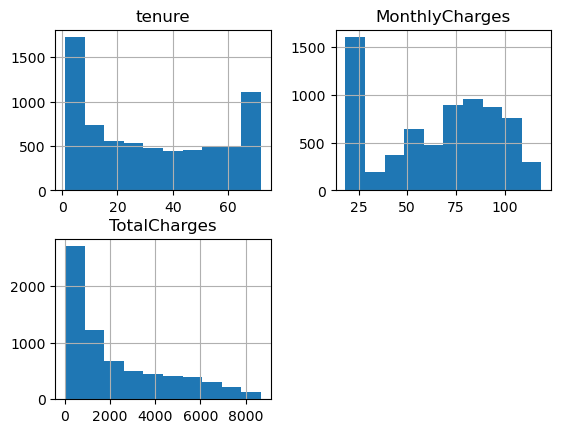

In [13]:
# Visual Python: Data Analysis > Data Info
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist()
plt.show()

#### Q. 박스플롯을 이용해 수치형 컬럼들의 분포와 이상치를 확인하세요.
- 수치형 컬럼: `tenure`, `MonthlyCharges`, `TotalCharges`

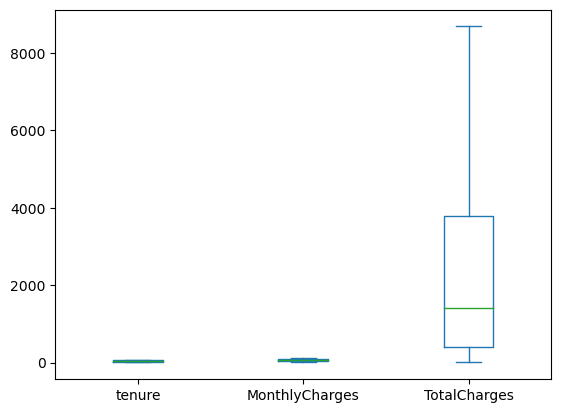

In [14]:
# Visual Python: Data Analysis > Data Info
df[['tenure','MonthlyCharges','TotalCharges']].plot(kind='box')
plt.show()

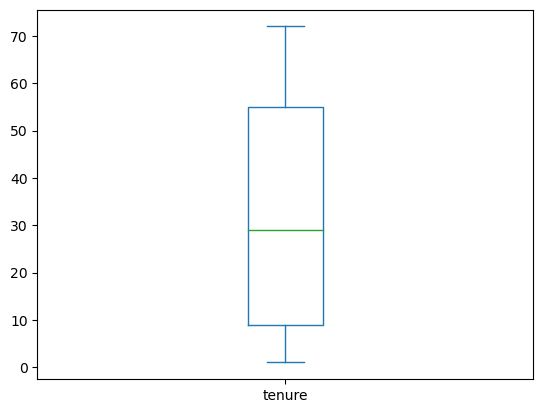

In [15]:
# Visual Python: Data Analysis > Data Info
df['tenure'].plot(kind='box')
plt.show()

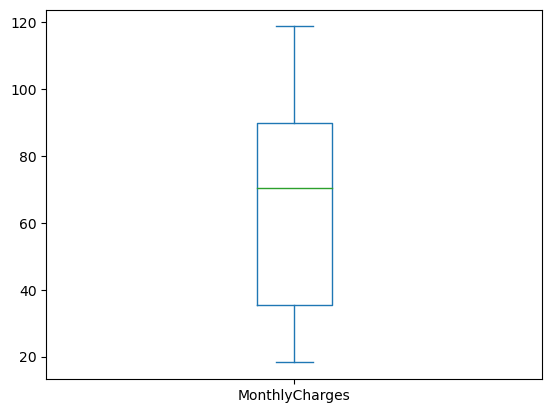

In [16]:
# Visual Python: Data Analysis > Data Info
df['MonthlyCharges'].plot(kind='box')
plt.show()

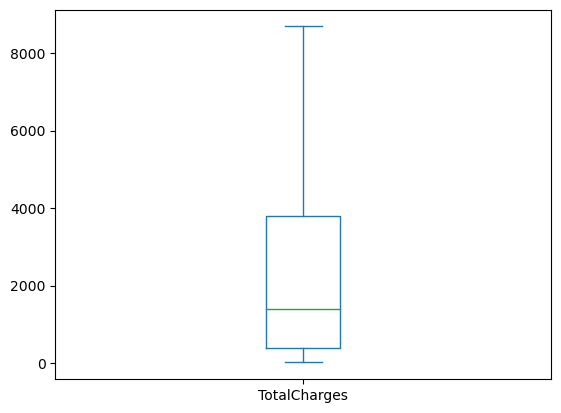

In [17]:
# Visual Python: Data Analysis > Data Info
df['TotalCharges'].plot(kind='box')
plt.show()

#### Q. 고객의 이탈 여부(`Churn`)의 Yes와 No의 비율을 countplot으로 그려보세요.

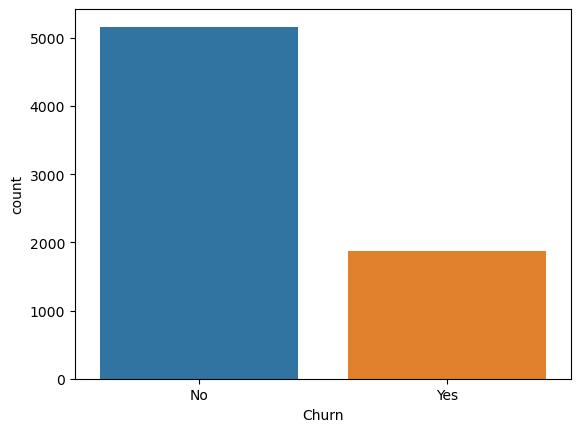

In [18]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=df, x='Churn')
plt.show()

#### Q. 고객의 이탈 여부(Churn)를 범주로 `Contract`와 `TechSupport`의 countplot을 그려보세요.

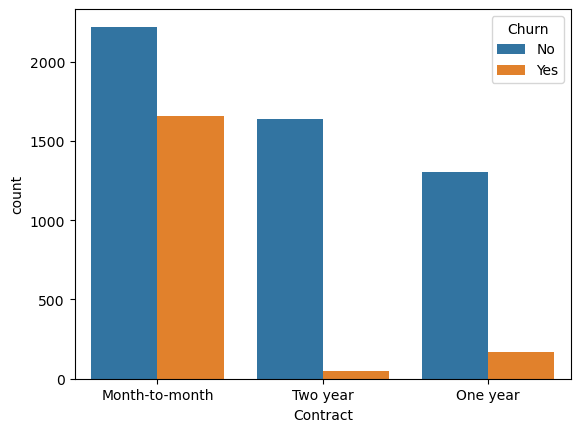

In [19]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=df, x='Contract', hue='Churn', order=df['Contract'].value_counts(ascending=False).index)
plt.show()

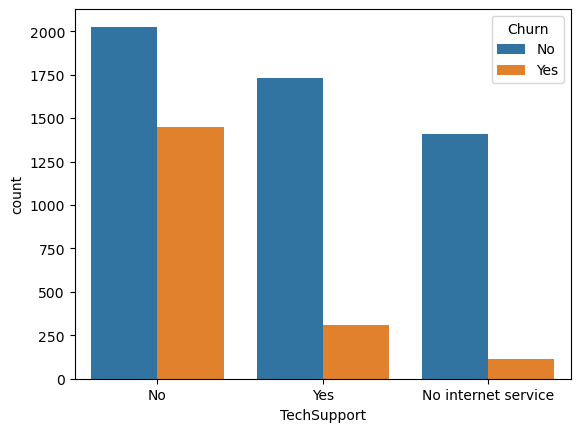

In [20]:
# Visual Python: Visualization > Seaborn
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.show()

#### Q. `gender`, `Partner`, `Dependents`, `PhoneService`, `Churn` 컬럼을 라벨 인코딩한 후 원본 컬럼을 삭제하세요.

In [21]:
# Visual Python: Data Analysis > Frame
df['gender_label'] = pd.Categorical(df['gender']).codes
df['Partner_label'] = pd.Categorical(df['Partner']).codes
df['Dependents_label'] = pd.Categorical(df['Dependents']).codes
df['PhoneService_label'] = pd.Categorical(df['PhoneService']).codes
df['Churn_label'] = pd.Categorical(df['Churn']).codes
df.drop(['gender','Partner','Dependents','PhoneService','Churn'], axis=1, inplace=True)
df

,SeniorCitizen,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender_label,Partner_label,Dependents_label,PhoneService_label,Churn_label
0,0,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0,0,0
1,0,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,1,0,0,1,0
2,0,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,0,1,1
3,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1,0,0,0,0
4,0,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,1,1,1,1,0
7039,0,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,1,1,1,0
7040,0,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1,1,0,0
7041,1,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1,0,1,1


#### Q.  나머지 모든 범주형 변수를 원핫인코딩 하세요.

In [22]:
# Visual Python: Data Analysis > Frame
df = pd.get_dummies(data=df, columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_label,Partner_label,Dependents_label,PhoneService_label,Churn_label,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,1,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


# RandomForestClassifier 모델로 분류하기

#### Q. `df`를 이용해 데이터셋을 train, test로 분리해주세요.

In [23]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_label', 'Partner_label', 'Dependents_label', 'PhoneService_label', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']], df['Churn_label'])

#### Q. RandomForestClassifier 모델을 생성하고, fit으로 학습시킨 후 예측 결과를 `pred`에 저장하세요.

In [24]:
# Visual Python: Machine Learning > Classifier
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [25]:
# Visual Python: Machine Learning > Fit/Predict
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
# Visual Python: Machine Learning > Fit/Predict
pred = model_rf.predict(X_test)
pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int8)

#### Q. 예측결과인 `pred`를 평가해 정확도(accuracy)와 f1-score를 확인하세요.
- Visual Python: Machine Learning > Evaluation

In [27]:
# Visual Python: Machine Learning > Evaluation
from sklearn import metrics

In [28]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [29]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
Churn_label,,,
0,1141,135,1276
1,257,225,482
All,1398,360,1758


In [30]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1276
           1       0.62      0.47      0.53       482

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.76      0.78      0.77      1758



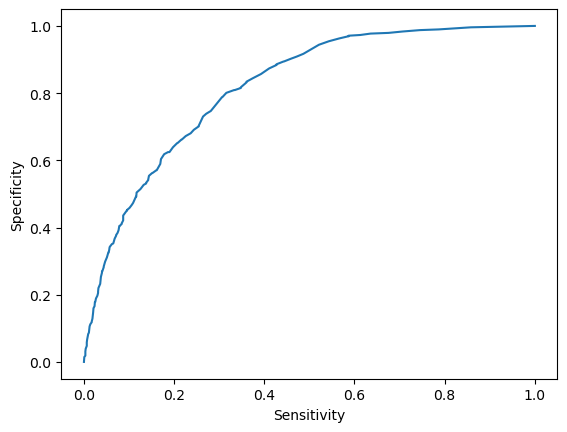

In [31]:
# Visual Python: Machine Learning > Model Info
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])                                
plt.plot(fpr, tpr, label='ROC Curve')                                
plt.xlabel('Sensitivity')                                
plt.ylabel('Specificity')                                
plt.show()

In [32]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * df_i['Feature_importance']
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

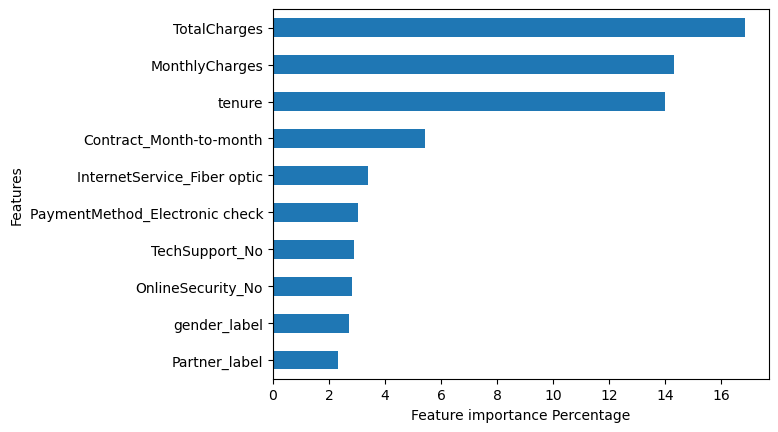

In [33]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model_rf, X_train, sort=True, top_count=10)

---

In [34]:
# End of file